In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

# Load the training dataset
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Display the first 5 rows
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
# Overview of dataset shape and column types
print(f"Shape of dataset: {df.shape}")
df.info()


Shape of dataset: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non

In [49]:
# Summary statistics for numerical columns
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [50]:
# Count of missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


**Step (ii): Handling Missing Values +  K-Fold Split.Step (ii.a): Read the dataset into a Pandas DataFrame(Since we've already done that in Step i, we reuse df.)**



**Step (ii.b): Handle Missing ValuesWe’ll handle missing values by:Filling numerical columns with median.Filling categorical columns with mode.**


In [51]:
# Separate columns by dtype
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numerical columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Confirm no missing values remain
df.isnull().sum().sum()  # Should print 0


0

**Step (ii.c): K-Fold Cross-Validation Split**

In [53]:
from sklearn.model_selection import KFold

# Create 5-Fold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get the first fold (train/test split)
for train_idx, test_idx in kf.split(df):
    train_df = df.iloc[train_idx].copy()
    test_df = df.iloc[test_idx].copy()
    break  # Only using the first fold

print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")


Train shape: (1168, 81), Test shape: (292, 81)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Extract features and target
X_train = train_df[['LotArea']]
y_train = train_df['SalePrice']
X_test = test_df[['LotArea']]
y_test = test_df['SalePrice']

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Equation: SalePrice = {slope:.2f} * LotArea + {intercept:.2f}")


Linear Regression Equation: SalePrice = 1.91 * LotArea + 161006.99


**Evaluate the model:**

In [55]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2f}, R²: {r2_train:.4f}")
print(f"Testing MSE: {mse_test:.2f}, R²: {r2_test:.4f}")


Training MSE: 5541876621.93, R²: 0.0709
Testing MSE: 7189094014.83, R²: 0.0627


**Plot predictions vs actual (Bonus)**

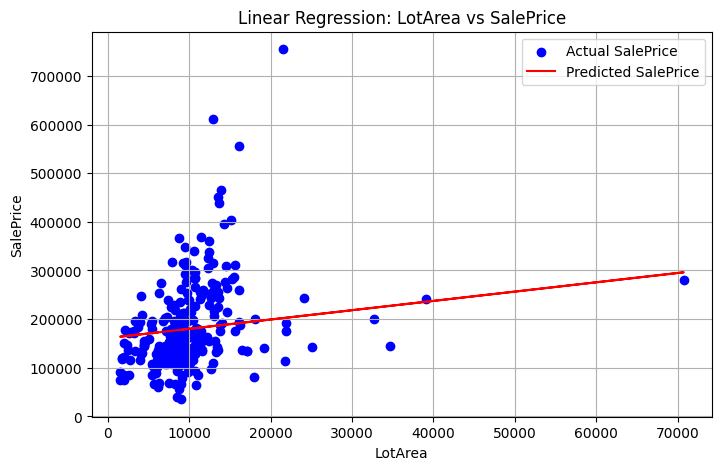

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual SalePrice')
plt.plot(X_test, y_test_pred, color='red', label='Predicted SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression: LotArea vs SalePrice')
plt.legend()
plt.grid(True)
plt.show()



**Step (iv): Multiple Linear Regression with More FeaturesModel Definitions**


**Model 1: LotFrontage, LotArea**

**Model 2: LotFrontage, LotArea, OverallQual, OverallCond**

**Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea**

Common Setup:

In [57]:
def train_and_evaluate(features, model_name):
    X_train = train_df[features]
    y_train = train_df['SalePrice']
    X_test = test_df[features]
    y_test = test_df['SalePrice']

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\n📌 {model_name}")
    print(f"Features: {features}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_:.2f}")
    print(f"Training MSE: {mse_train:.2f}, R²: {r2_train:.4f}")
    print(f"Testing MSE: {mse_test:.2f}, R²: {r2_test:.4f}")
    
    return model.coef_[features.index('LotArea')]  # return LotArea coefficient


**Train Each Model**

In [58]:
# Model 1
model1_features = ['LotFrontage', 'LotArea']
coef_model1 = train_and_evaluate(model1_features, "Model 1")

# Model 2
model2_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
coef_model2 = train_and_evaluate(model2_features, "Model 2")

# Model 3
model3_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
coef_model3 = train_and_evaluate(model3_features, "Model 3")



📌 Model 1
Features: ['LotFrontage', 'LotArea']
Coefficients: [879.19164965   1.36691354]
Intercept: 105203.51
Training MSE: 5186273048.28, R²: 0.1305
Testing MSE: 6392300543.35, R²: 0.1666

📌 Model 2
Features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
Coefficients: [ 3.11936911e+02  1.17042224e+00  4.22301591e+04 -3.43928156e+02]
Intercept: -109529.16
Training MSE: 2032245097.12, R²: 0.6593
Testing MSE: 2327603318.28, R²: 0.6965

📌 Model 3
Features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
Coefficients: [-5.09644929e+00  6.64687788e-01  3.10746441e+04  7.98466658e+02
  3.21839371e+01  3.86740160e+01]
Intercept: -116696.70
Training MSE: 1594273878.73, R²: 0.7327
Testing MSE: 1702635102.74, R²: 0.7780


**Step (v): Compare MSE and R² scores for each model.**

Summary Table

In [59]:
# Store metrics
metrics = []

def train_and_evaluate(features, model_name):
    X_train = train_df[features]
    y_train = train_df['SalePrice']
    X_test = test_df[features]
    y_test = test_df['SalePrice']

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    metrics.append({
        'Model': model_name,
        'Train MSE': mse_train,
        'Test MSE': mse_test,
        'Train R²': r2_train,
        'Test R²': r2_test
    })

    return model.coef_[features.index('LotArea')]  # return LotArea coefficient


Now re-train and collect results again:

In [60]:
# Clear metrics list if re-running
metrics = []

coef_model1 = train_and_evaluate(['LotFrontage', 'LotArea'], "Model 1")
coef_model2 = train_and_evaluate(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'], "Model 2")
coef_model3 = train_and_evaluate(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea'], "Model 3")

# Convert to DataFrame for display
comparison_df = pd.DataFrame(metrics)
comparison_df


,Model,Train MSE,Test MSE,Train R²,Test R²
0,Model 1,5.186273e+09,6.392301e+09,0.130484,0.166619
1,Model 2,2.032245e+09,2.327603e+09,0.659279,0.696544
2,Model 3,1.594274e+09,1.702635e+09,0.732708,0.778023


**Step (vi): Multiple Regression with Mixed (Numerical + Categorical) Features**

**Model 4: LotArea, Street**

**Model 5: LotArea, OverallCond, Street, Neighborhood**

**Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year**

📝 Note: Street and Neighborhood are categorical, so we need to encode them using One-Hot Encoding.
Also, there’s no feature named Year — so we’ll use YearBuilt instead.

**Step 1: Combine Train and Test for Consistent Encoding**

In [61]:
# Add identifier
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'

# Combine for consistent one-hot encoding
full_df = pd.concat([train_df, test_df], axis=0)


**Step 2: One-Hot Encode Categorical Columns**

In [62]:
# Encode categorical columns: Street, Neighborhood
full_df_encoded = pd.get_dummies(full_df, columns=['Street', 'Neighborhood'], drop_first=True)

# Split back into train and test
train_df_encoded = full_df_encoded[full_df_encoded['dataset'] == 'train'].drop('dataset', axis=1)
test_df_encoded = full_df_encoded[full_df_encoded['dataset'] == 'test'].drop('dataset', axis=1)


**Step 3: Define and Train Models**

In [63]:
# Clear metrics list again
metrics = []

def train_and_evaluate_encoded(features, model_name):
    X_train = train_df_encoded[features]
    y_train = train_df_encoded['SalePrice']
    X_test = test_df_encoded[features]
    y_test = test_df_encoded['SalePrice']

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    metrics.append({
        'Model': model_name,
        'Train MSE': mse_train,
        'Test MSE': mse_test,
        'Train R²': r2_train,
        'Test R²': r2_test
    })

    return model.coef_[features.index('LotArea')]  # return LotArea coefficient


**Train the Mixed Models**

In [64]:
# Model 4
model4_features = ['LotArea'] + [col for col in train_df_encoded.columns if col.startswith('Street_')]
coef_model4 = train_and_evaluate_encoded(model4_features, "Model 4")

# Model 5
model5_features = ['LotArea', 'OverallCond'] + [col for col in train_df_encoded.columns if col.startswith('Street_') or col.startswith('Neighborhood_')]
coef_model5 = train_and_evaluate_encoded(model5_features, "Model 5")

# Model 6
model6_features = ['LotArea', 'OverallCond', '1stFlrSF', 'YearBuilt'] + [col for col in train_df_encoded.columns if col.startswith('Street_') or col.startswith('Neighborhood_')]
coef_model6 = train_and_evaluate_encoded(model6_features, "Model 6")


**View Model Comparison**

In [65]:
# Show all 6 model metrics
comparison_df2 = pd.DataFrame(metrics)
comparison_df2


,Model,Train MSE,Test MSE,Train R²,Test R²
0,Model 4,5.501518e+09,7.066617e+09,0.077631,0.078707
1,Model 5,2.553702e+09,3.018647e+09,0.571853,0.606451
2,Model 6,1.822806e+09,2.149929e+09,0.694393,0.719708


**Step (vii): Compare and Plot LotArea Coefficients Across All 6 Models**

**Step 1: Store Coefficients**

Ensure you have these variables from earlier steps:

coef_model1, coef_model2, coef_model3

coef_model4, coef_model5, coef_model6

Now combine them:

In [66]:
import matplotlib.pyplot as plt

model_names = [
    'Model 1',
    'Model 2',
    'Model 3',
    'Model 4',
    'Model 5',
    'Model 6'
]

lotarea_coefs = [
    coef_model1,
    coef_model2,
    coef_model3,
    coef_model4,
    coef_model5,
    coef_model6
]


**Step 2: Plot the Graph**

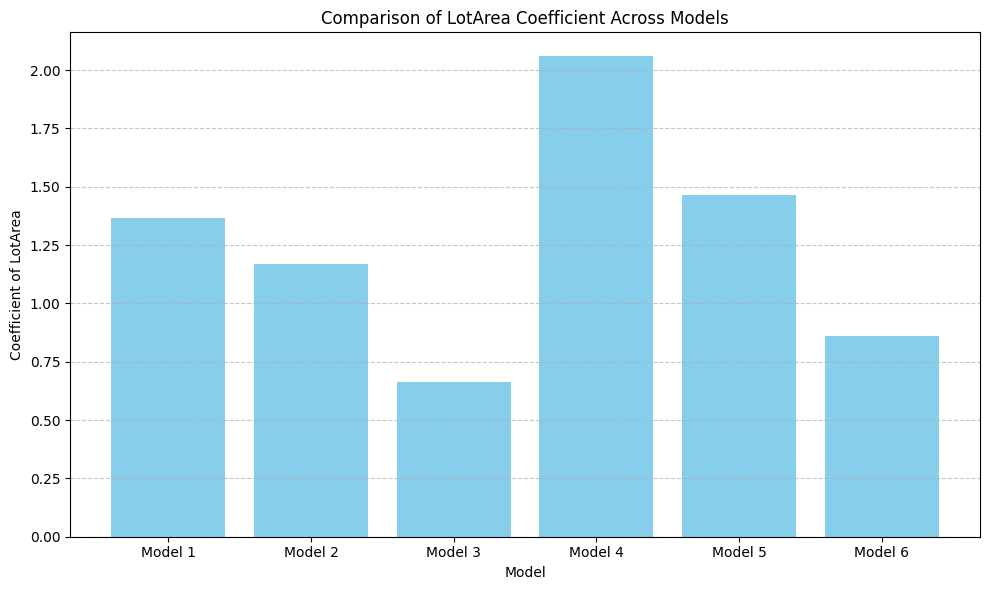

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, lotarea_coefs, color='skyblue')
plt.title('Comparison of LotArea Coefficient Across Models')
plt.ylabel('Coefficient of LotArea')
plt.xlabel('Model')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Step (viii): Polynomial Regression on LotArea (Bonus)**

We’ll use degree 2 and 3 polynomial regression to model the relationship between LotArea and SalePrice.

**Step 1: Import Required Tools**

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


 **Step 2: Fit Polynomial Models**

We’ll define a reusable function to:

Create polynomial features

Train the model

Plot results for both training and test sets


In [70]:
def train_plot_poly(degree, X_train, y_train, X_test, y_test):
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)

    y_train_pred = poly_model.predict(X_train)
    y_test_pred = poly_model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\n📘 Polynomial Regression (Degree {degree})")
    print(f"Training MSE: {mse_train:.2f}, R²: {r2_train:.4f}")
    print(f"Testing MSE: {mse_test:.2f}, R²: {r2_test:.4f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test, label='Actual', color='gray', alpha=0.5)
    sorted_idx = X_test.squeeze().argsort()
    plt.plot(X_test.iloc[sorted_idx], y_test_pred[sorted_idx], color='red', label=f'Degree {degree} Prediction')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('LotArea')
    plt.ylabel('SalePrice')
    plt.legend()
    plt.grid(True)
    plt.show()


**Step 3: Apply to Degree 2 and 3**


📘 Polynomial Regression (Degree 2)
Training MSE: 5111227775.87, R²: 0.1431
Testing MSE: 6798750064.71, R²: 0.1136


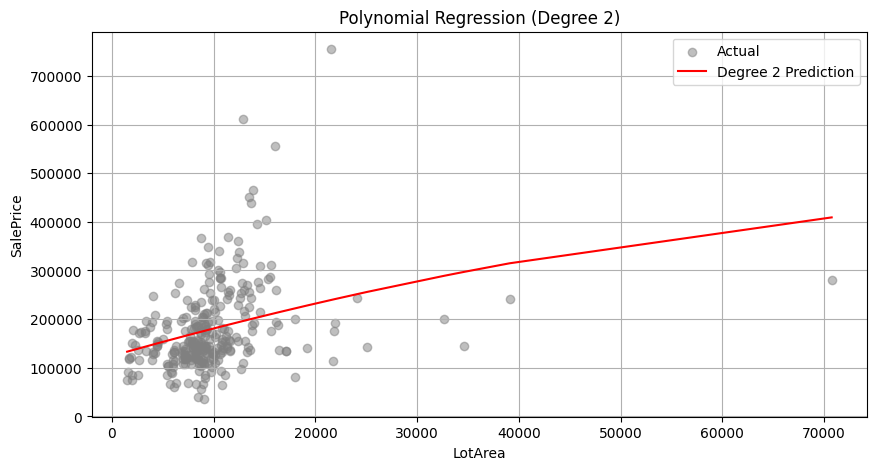


📘 Polynomial Regression (Degree 3)
Training MSE: 4910581442.37, R²: 0.1767
Testing MSE: 6624267430.93, R²: 0.1364


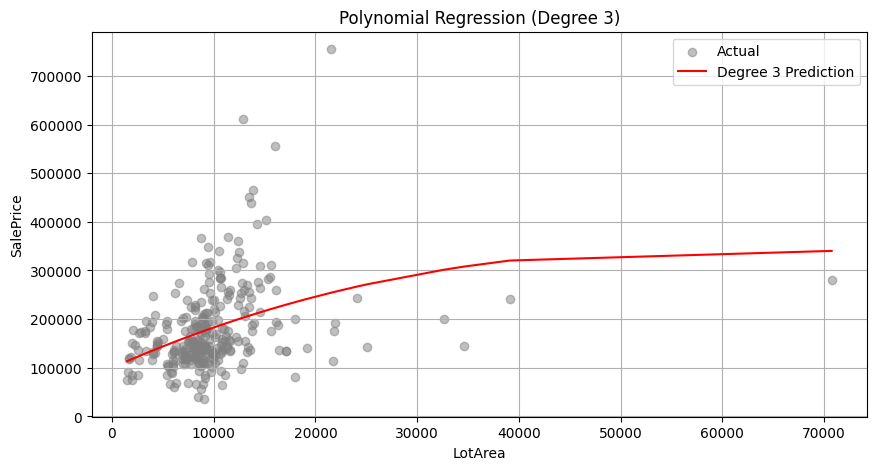

In [71]:
X_train = train_df[['LotArea']]
y_train = train_df['SalePrice']
X_test = test_df[['LotArea']]
y_test = test_df['SalePrice']

# Degree 2
train_plot_poly(2, X_train, y_train, X_test, y_test)

# Degree 3
train_plot_poly(3, X_train, y_train, X_test, y_test)


In [73]:
def train_and_evaluate(features, model_name):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split

    X = train_df[features]
    y = train_df['SalePrice']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    print(f"{model_name} trained.")

    return model, X_train, X_test, y_train, y_test


In [74]:
def train_and_evaluate_encoded(features, model_name):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split

    X = train_df_encoded[features]
    y = train_df_encoded['SalePrice']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    print(f"{model_name} trained.")

    return model, X_train, X_test, y_train, y_test


In [75]:
model1, X_train1, X_test1, y_train1, y_test1 = train_and_evaluate(model1_features, "Model 1")
model2, X_train2, X_test2, y_train2, y_test2 = train_and_evaluate(model2_features, "Model 2")
model3, X_train3, X_test3, y_train3, y_test3 = train_and_evaluate(model3_features, "Model 3")
model4, X_train4, X_test4, y_train4, y_test4 = train_and_evaluate_encoded(model4_features, "Model 4")
model5, X_train5, X_test5, y_train5, y_test5 = train_and_evaluate_encoded(model5_features, "Model 5")
model6, X_train6, X_test6, y_train6, y_test6 = train_and_evaluate_encoded(model6_features, "Model 6")


Model 1 trained.
Model 2 trained.
Model 3 trained.
Model 4 trained.
Model 5 trained.
Model 6 trained.


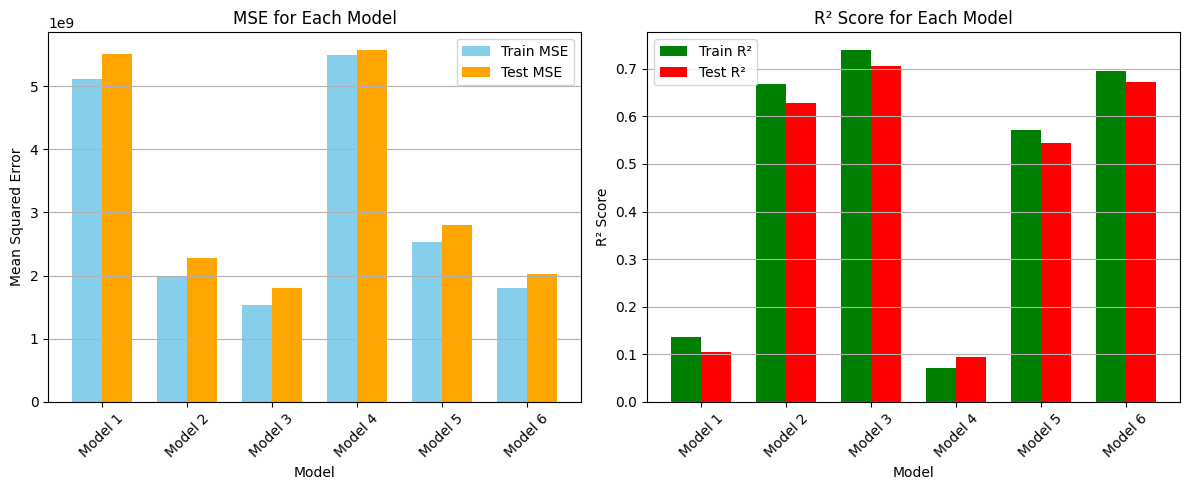

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Replace y_train_predX and y_test_predX with your actual predictions
# Example: y_train_pred1 = model1.predict(X_train1), etc.

# Collect scores
mse_train = []
mse_test = []
r2_train = []
r2_test = []

models = [model1, model2, model3, model4, model5, model6]
X_trains = [X_train1, X_train2, X_train3, X_train4, X_train5, X_train6]
X_tests = [X_test1, X_test2, X_test3, X_test4, X_test5, X_test6]
y_trains = [y_train1, y_train2, y_train3, y_train4, y_train5, y_train6]
y_tests = [y_test1, y_test2, y_test3, y_test4, y_test5, y_test6]

for model, X_train, X_test, y_train, y_test in zip(models, X_trains, X_tests, y_trains, y_tests):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    r2_train.append(r2_score(y_train, y_train_pred))
    r2_test.append(r2_score(y_test, y_test_pred))

# Plot MSE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bar_width = 0.35
index = np.arange(len(models))
plt.bar(index, mse_train, bar_width, label='Train MSE', color='skyblue')
plt.bar(index + bar_width, mse_test, bar_width, label='Test MSE', color='orange')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Each Model')
plt.xticks(index + bar_width / 2, ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'], rotation=45)
plt.legend()
plt.grid(axis='y')

# Plot R² Score
plt.subplot(1, 2, 2)
plt.bar(index, r2_train, bar_width, label='Train R²', color='green')
plt.bar(index + bar_width, r2_test, bar_width, label='Test R²', color='red')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('R² Score for Each Model')
plt.xticks(index + bar_width / 2, ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'], rotation=45)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()